### Libraries to import

In [851]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import cv2

from scipy import signal

### Load the image

In [852]:
path1 = "_images/virtual_landscape.jpg"
path2 = "_images/cute_cat.jpg"
path3 = "_images/25_abril.webp"
path4 = "_images/black_white_flower.webp"
path5 = "_images/s2_lisbon_.jpg"
path6 = "_images/stripes.jpg"

In [883]:
dataset = rasterio.open(path2)
img = dataset.read() 
print("Type:", type(img))  
print("Shape:", img.shape)       
print("Width:", img.shape[2])
print("Height:", img.shape[1])
print("Number of bands:", img.shape[0])
print("Dtype:", img.dtype)

Type: <class 'numpy.ndarray'>
Shape: (3, 976, 600)
Width: 600
Height: 976
Number of bands: 3
Dtype: uint8


/opt/anaconda3/lib/python3.13/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [884]:
band1 = dataset.read(1)
band2 = dataset.read(2)
band3 = dataset.read(3)
bands = [band1, band2, band3]
band = bands[1]

### Visualize the image

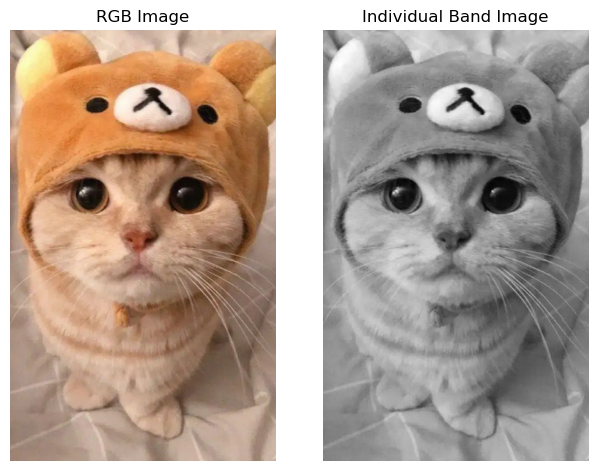

In [885]:
rgb = np.dstack((band1, band2, band3))

fig, axes = plt.subplots(1, 2)  

axes[0].imshow(rgb)  
axes[0].set_title("RGB Image")   
axes[0].axis('off')

axes[1].imshow(band, cmap='gray')  
axes[1].set_title("Individual Band Image")   
axes[1].axis('off')

plt.tight_layout()
plt.show()


## 1. Code the correlation and convolution operator

In [905]:
A1 = np.array([[0, 0, 0],       # sum w = 0
               [0, 0, 0],
               [0, 0, 0]])

A2 = np.array([[0, 0, 0],       # sum w = 1
               [0, 1, 0],
               [0, 0, 0]])     

A3 = np.array([[1, 1, 1],       # sum w = 9
               [1, 1, 1],
               [1, 1, 1]])

A4 = np.array([[1, 2, 1],       # sum w = 16
               [2, 4, 2],
               [1, 2, 1]])

A5 = np.array([[-1, -1, -1],        # sum w = 0 (with negative w)
               [-1, 8, -1],
               [-1, -1, -1]])

A6 = np.array([[0, -1, 0],      # sum w = 0 (with some negative w)
               [-1, 4, -1],
               [0, -1, 0]])

A7 = np.array([[0, -1, 0],      # sum w = 1 (with some negative w)
               [-1, 5, -1],
               [0, -1, 0]])

A8 = np.array([[-1, -1, -1],    # sum w = 0 (with some negative w)  
               [0, 0, 0],
               [1, 1, 1]])      

A9 = np.array([[-1, 0, 1],    # sum w = 0 (with some negative w) 
               [-1, 0, 1],
               [-1, 0, 1]]) 

kernel = A3#*(-1)

In [906]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [907]:
#kernel = np.flipud(np.fliplr(kernel))
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [908]:
# band = np.random.randint(0, 256, size=(5, 5), dtype=np.uint8)
# band

### with loops, without relying on Python convolution function

In [909]:
pad_h = kernel.shape[0] // 2
pad_w = kernel.shape[1] // 2
pad = np.pad(band, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')

filtered_loop = np.zeros_like(band)
flipped_kernel = np.flipud(np.fliplr(kernel))

for i in range(band.shape[0]): 
    for j in range(band.shape[1]):
        region = pad[i:i+flipped_kernel.shape[0], j:j+flipped_kernel.shape[1]]
        filtered_loop[i, j] = np.sum(region * flipped_kernel)
filtered_loop = (filtered_loop).astype(np.uint8)

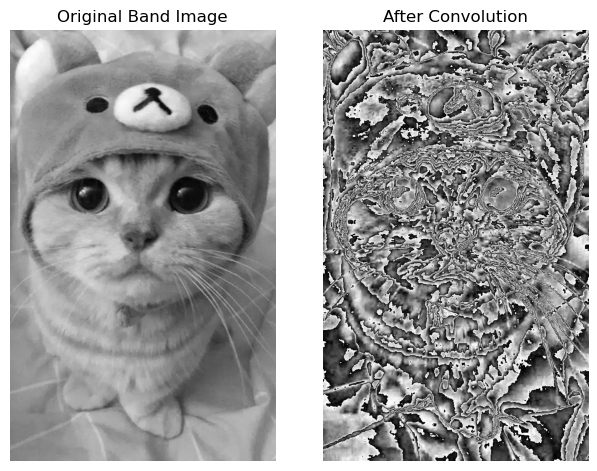

In [910]:
fig, axes = plt.subplots(1, 2)  

axes[0].imshow(band, cmap='grey')  
axes[0].set_title("Original Band Image")   
axes[0].axis('off')

axes[1].imshow(filtered_loop, cmap='gray')  
axes[1].set_title("After Convolution")   
axes[1].axis('off')

plt.tight_layout()
plt.show()

### using functions available in Python (like `NumPy` and `SciPy`)

In [841]:
filtered_function = (signal.convolve2d(band, kernel, mode='same', boundary='symmetric')).astype(np.uint8)

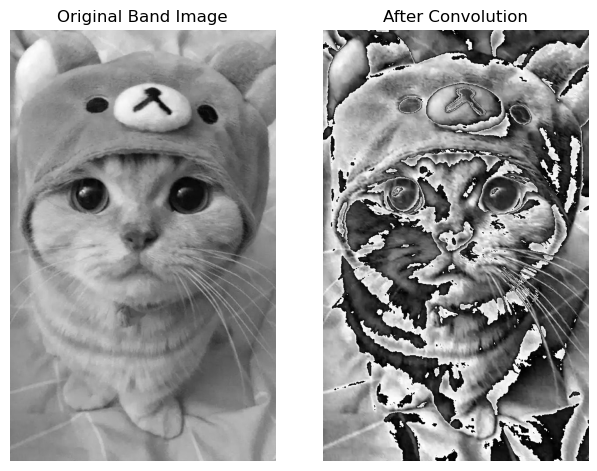

In [842]:
fig, axes = plt.subplots(1, 2)  

axes[0].imshow(band, cmap='grey')  
axes[0].set_title("Original Band Image")   
axes[0].axis('off')

axes[1].imshow(filtered_function, cmap='gray')  
axes[1].set_title("After Convolution")   
axes[1].axis('off')

plt.tight_layout()
plt.show()

### do this two methods work the same way?

In [843]:
band

array([[143, 143, 142, ..., 194, 190, 187],
       [143, 143, 143, ..., 194, 190, 187],
       [143, 143, 144, ..., 194, 190, 188],
       ...,
       [129, 129, 129, ..., 172, 170, 170],
       [129, 129, 129, ..., 173, 176, 178],
       [129, 129, 129, ..., 178, 181, 183]], dtype=uint8)

In [844]:
filtered_loop

array([[173, 173, 172, ...,  71,  59,  52],
       [173, 174, 175, ...,  71,  60,  53],
       [175, 176, 178, ...,  71,  61,  55],
       ...,
       [131, 131, 131, ...,  19,  10,   3],
       [131, 131, 131, ...,  17,  19,  19],
       [131, 131, 131, ...,  19,  25,  30]], dtype=uint8)

In [845]:
filtered_function

array([[173, 173, 172, ...,  71,  59,  52],
       [173, 174, 175, ...,  71,  60,  53],
       [175, 176, 178, ...,  71,  61,  55],
       ...,
       [131, 131, 131, ...,  19,  10,   3],
       [131, 131, 131, ...,  17,  19,  19],
       [131, 131, 131, ...,  19,  25,  30]], dtype=uint8)

In [846]:
filter_vs_band = (filtered_loop == band)
filter_vs_filter = (filtered_loop == filtered_function)
print(np.unique(filter_vs_band))
print(np.unique(filter_vs_filter))

[False  True]
[ True]


## 2. Apply correlation and convolution with basic kernels

### `W = 0`

In [912]:
kernel = A1
kernel

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [913]:
filtered_function = (signal.convolve2d(band, kernel, mode='same', boundary='symmetric')).astype(np.uint8)

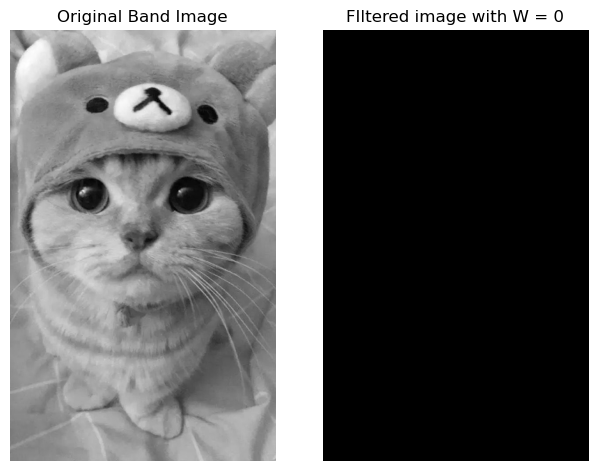

In [914]:
fig, axes = plt.subplots(1, 2)  

axes[0].imshow(band, cmap='grey')  
axes[0].set_title("Original Band Image")   
axes[0].axis('off')

axes[1].imshow(filtered_function, cmap='gray')  
axes[1].set_title("FIltered image with W = 0")   
axes[1].axis('off')

plt.tight_layout()
plt.show()

Every pixel gets the value 0 so the image becomes completly black.

### `W = Id`

In [915]:
kernel = A2
kernel

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [916]:
filtered_function = (signal.convolve2d(band, kernel, mode='same', boundary='symmetric')).astype(np.uint8)

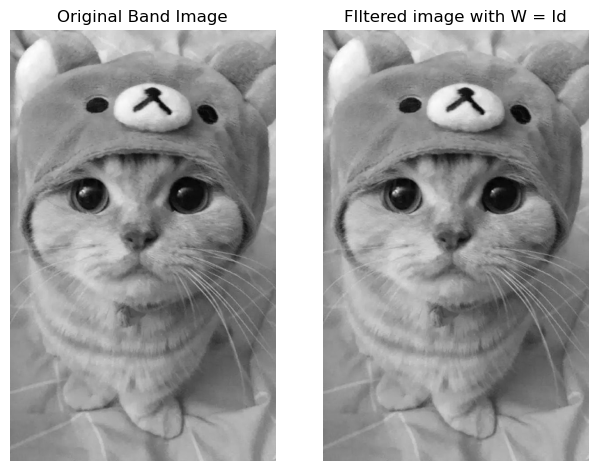

In [917]:
fig, axes = plt.subplots(1, 2)  

axes[0].imshow(band, cmap='grey')  
axes[0].set_title("Original Band Image")   
axes[0].axis('off')

axes[1].imshow(filtered_function, cmap='gray')  
axes[1].set_title("FIltered image with W = Id")   
axes[1].axis('off')

plt.tight_layout()
plt.show()

The filter returns the exact same image, without any change.

### `W = 1`

In [918]:
kernel = A3
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [919]:
filtered_function = (signal.convolve2d(band, kernel, mode='same', boundary='symmetric')).astype(np.uint8)

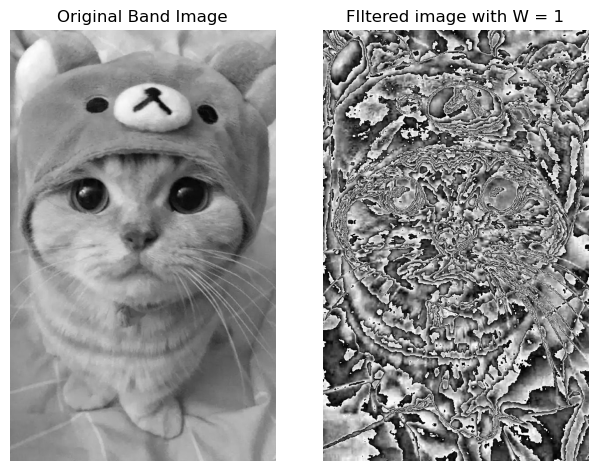

In [920]:
fig, axes = plt.subplots(1, 2)  

axes[0].imshow(band, cmap='grey')  
axes[0].set_title("Original Band Image")   
axes[0].axis('off')

axes[1].imshow(filtered_function, cmap='gray')  
axes[1].set_title("FIltered image with W = 1")   
axes[1].axis('off')

plt.tight_layout()
plt.show()

Every pixel is replaced by the sum of its neighborhood so the final image gets super blured

### `|W|` lower/greater/equal to 1, equal to 0 (with some `wi` negative)

In [965]:
kernel_w_equals_1 = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]], dtype=float)/9

kernel_w_greater_1 = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

kernel_w_lower_1 = np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]], dtype=float)/100

kernel_w_equals_0 = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])

kernel_some_w_lower_1 = np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]])

In [968]:
filtered_function_1 = (signal.convolve2d(band, kernel_w_equals_1, mode='same', boundary='symmetric')).astype(np.uint8)
filtered_function_2 = (signal.convolve2d(band, kernel_w_greater_1, mode='same', boundary='symmetric')).astype(np.uint8)
filtered_function_3 = (signal.convolve2d(band, kernel_w_lower_1, mode='same', boundary='symmetric')).astype(np.uint8)
filtered_function_4 = (signal.convolve2d(band, kernel_w_equals_0, mode='same', boundary='symmetric')).astype(np.uint8)
filtered_function_5 = (signal.convolve2d(band, kernel_some_w_lower_1, mode='same', boundary='symmetric')).astype(np.uint8)

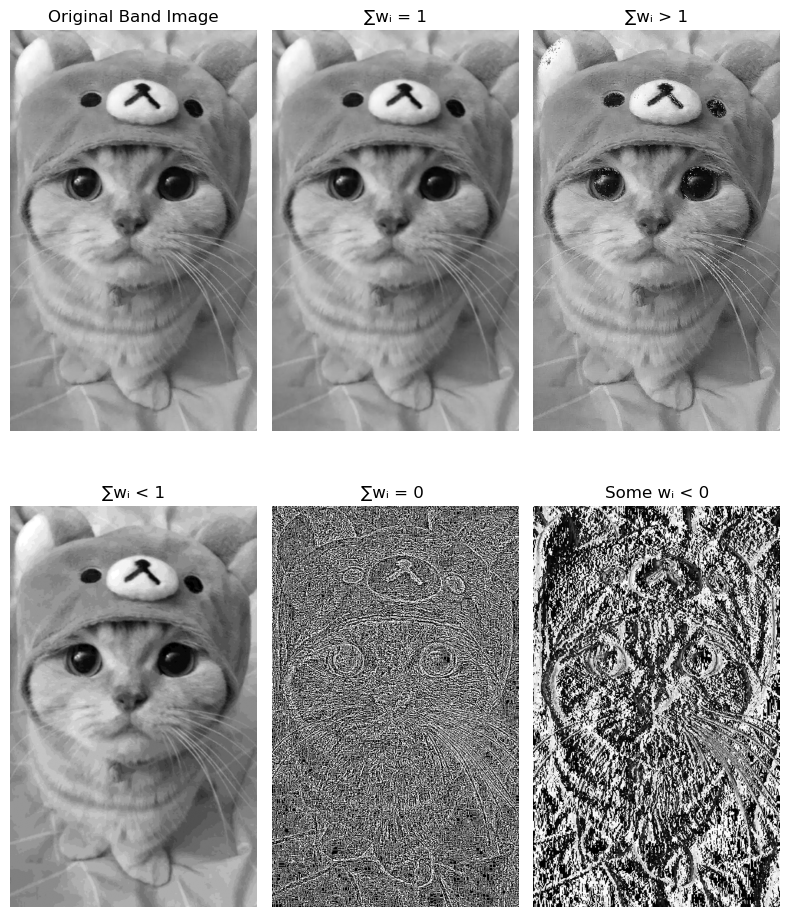

In [969]:
fig, axes = plt.subplots(2, 3, figsize=(8, 10))  

axes[0][0].imshow(band, cmap='grey')  
axes[0][0].set_title("Original Band Image")   
axes[0][0].axis('off')

axes[0][1].imshow(filtered_function_1, cmap='gray')  
axes[0][1].set_title("∑wᵢ = 1")   
axes[0][1].axis('off')

axes[0][2].imshow(filtered_function_2, cmap='gray')  
axes[0][2].set_title("∑wᵢ > 1")   
axes[0][2].axis('off')

axes[1][0].imshow(filtered_function_3, cmap='gray')  
axes[1][0].set_title("∑wᵢ < 1")   
axes[1][0].axis('off')

axes[1][1].imshow(filtered_function_4, cmap='gray')  
axes[1][1].set_title("∑wᵢ = 0 ")   
axes[1][1].axis('off')

axes[1][2].imshow(filtered_function_5, cmap='gray')  
axes[1][2].set_title("Some wᵢ < 0")   
axes[1][2].axis('off')

plt.tight_layout()
plt.show()

| Kernel type / sum rule | Effect on image                       |
|-------------------------|---------------------------------------|
| ∑wᵢ = 1                | Blur / smoothing          |
| ∑wᵢ > 1                | Amplify / brighten / sharpen          |
| ∑wᵢ < 1                | Darken / suppress intensity           |
| ∑wᵢ = 0                | Remove average brightness, edge/high-pass filter |
| Some wᵢ < 0             | Edge detection / high-pass            |
